In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [2]:
df= pd.read_csv("thyroidDF.csv")
df.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [5]:
df1 = df.copy()
df1.head(3)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042


In [6]:
# dropping these fields as they have no much use
df1.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)


In [7]:
ctry = df1.copy()

In [8]:
# Mapping the target field
result = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}

ctry['target'] = ctry['target'].map(result)


In [9]:
ctry.dropna(subset=['target'], inplace=True) 

# dataset initial summary
ctry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7546 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7546 non-null   int64  
 1   sex                  7296 non-null   object 
 2   on_thyroxine         7546 non-null   object 
 3   query_on_thyroxine   7546 non-null   object 
 4   on_antithyroid_meds  7546 non-null   object 
 5   sick                 7546 non-null   object 
 6   pregnant             7546 non-null   object 
 7   thyroid_surgery      7546 non-null   object 
 8   I131_treatment       7546 non-null   object 
 9   query_hypothyroid    7546 non-null   object 
 10  query_hyperthyroid   7546 non-null   object 
 11  lithium              7546 non-null   object 
 12  goitre               7546 non-null   object 
 13  tumor                7546 non-null   object 
 14  hypopituitary        7546 non-null   object 
 15  psych                7546 non-null   o

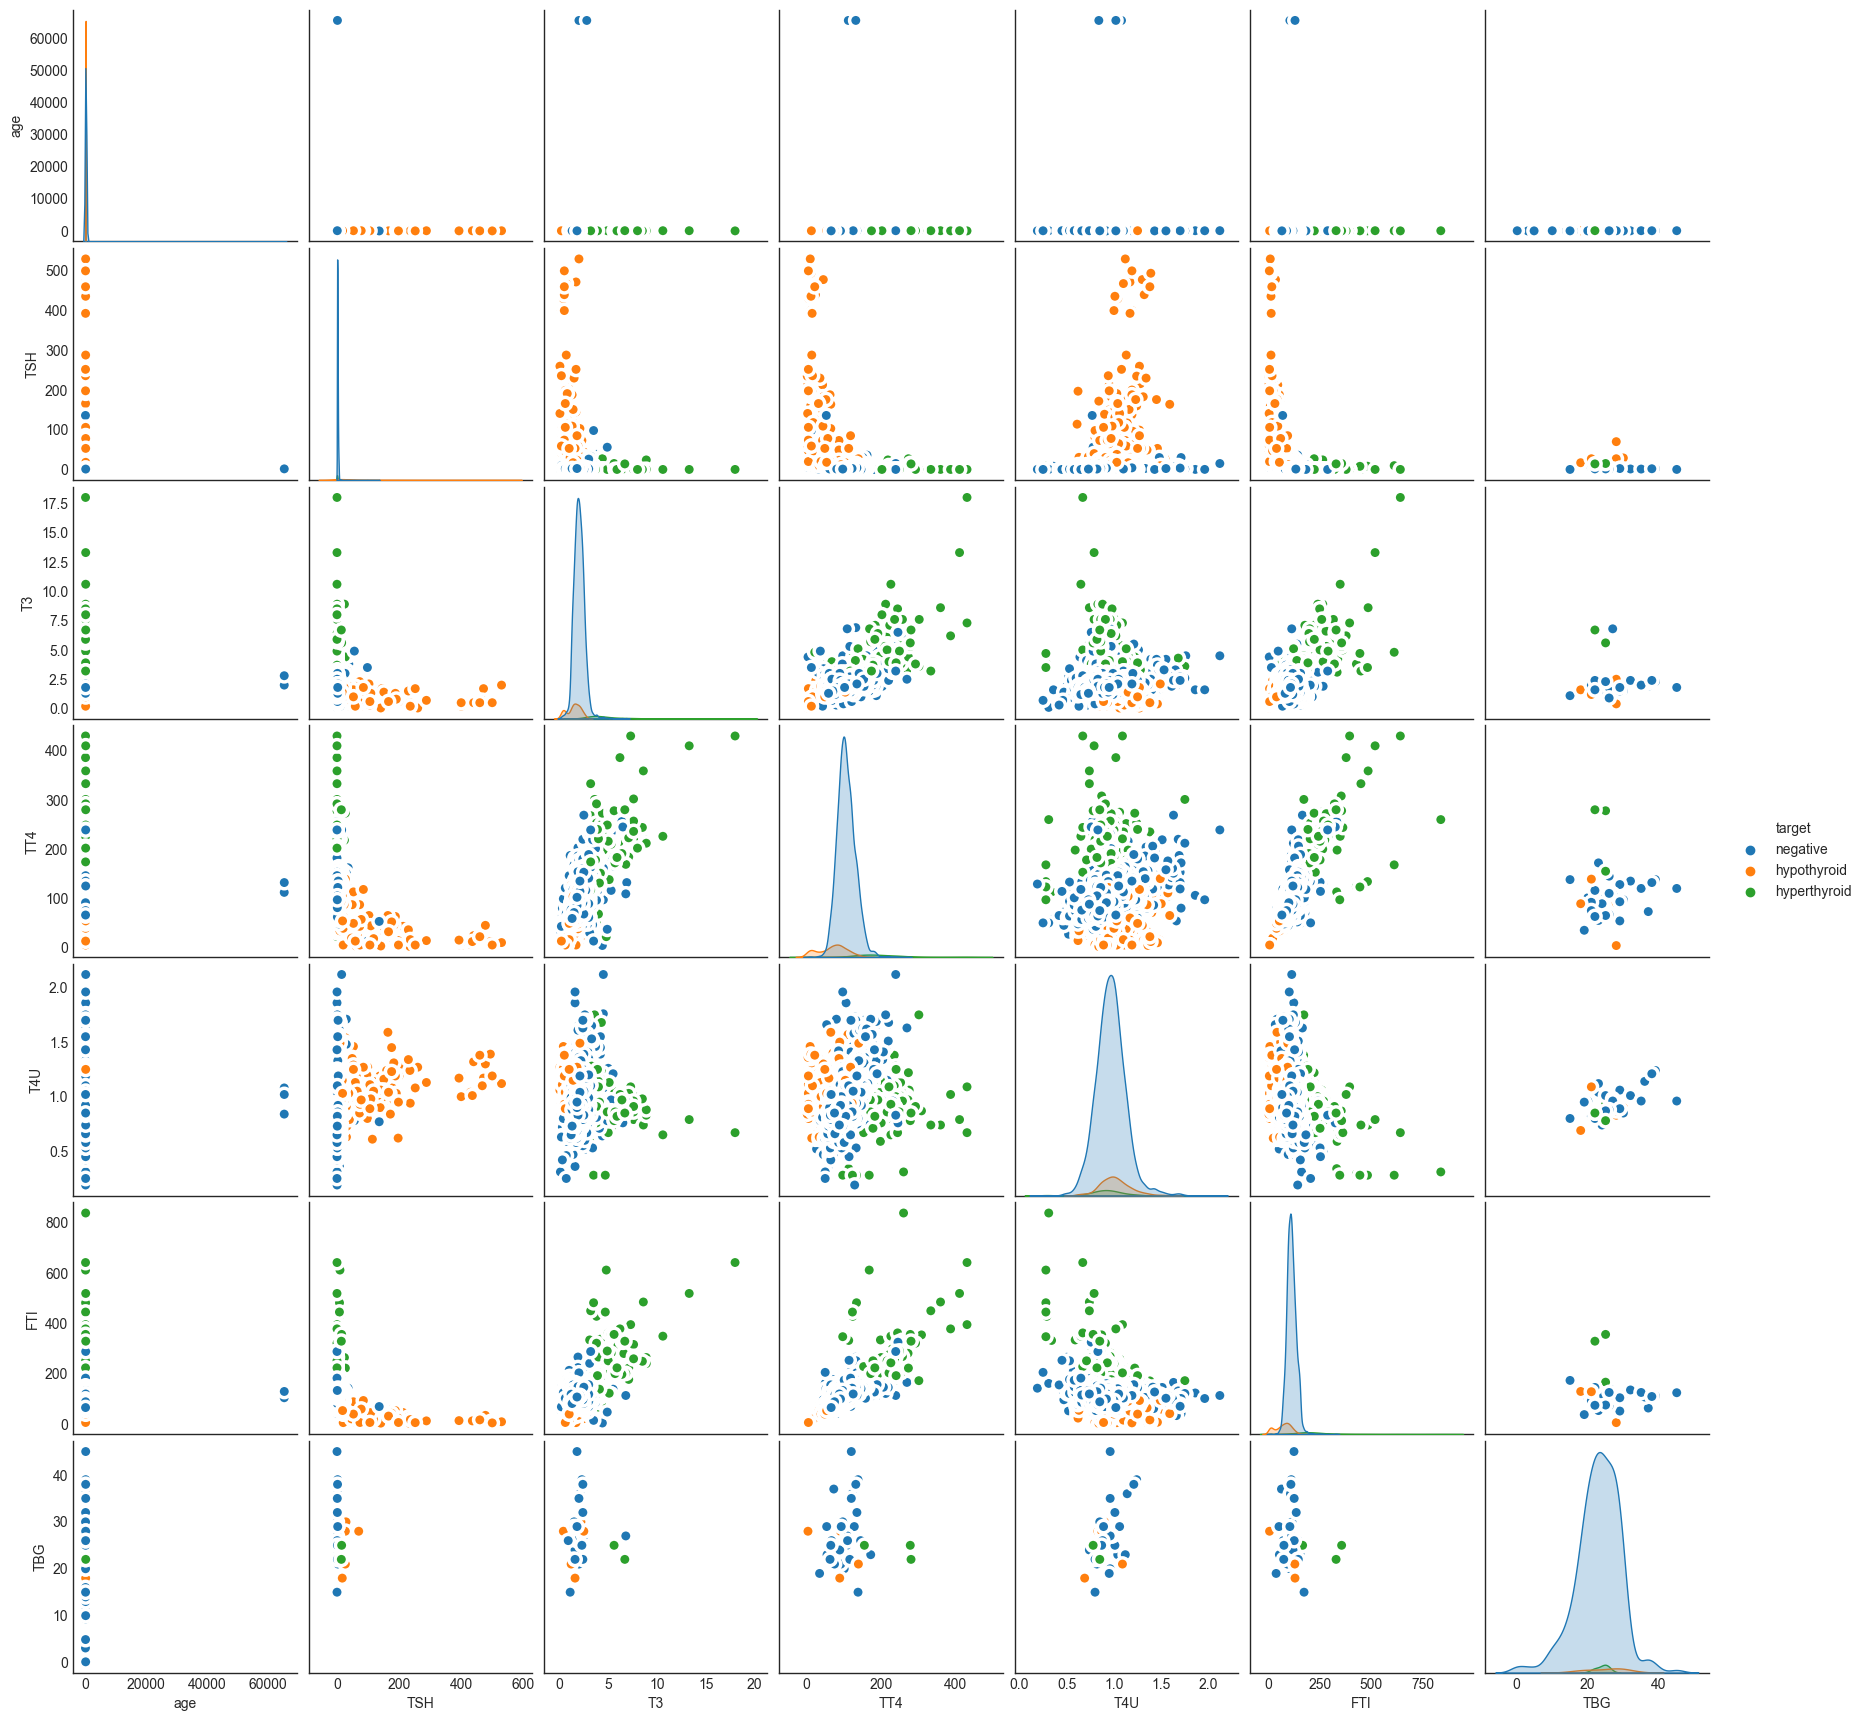

In [8]:
# Lets try to analyze the relationship between target and other attrivutes('TSH','T3','TT4','T4U','FTI','TBG')
#pairwise plot 
data_for_observation = ctry[['age','TSH','T3','TT4','T4U','FTI','TBG','target']].copy()
sns.pairplot(data_for_observation, kind="scatter", hue="target", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [10]:
# As we can observe from data age is 6000 and has value with FTI, T4U ..etc which is wrong data 
#will remove age outlier and check again
ctry['age'] = np.where((ctry.age > 100), np.nan, ctry.age)


In [24]:
ctry['age'].describe()

count    7542.000000
mean       51.934235
std        18.620319
min         1.000000
25%        37.000000
50%        55.000000
75%        67.000000
max        97.000000
Name: age, dtype: float64

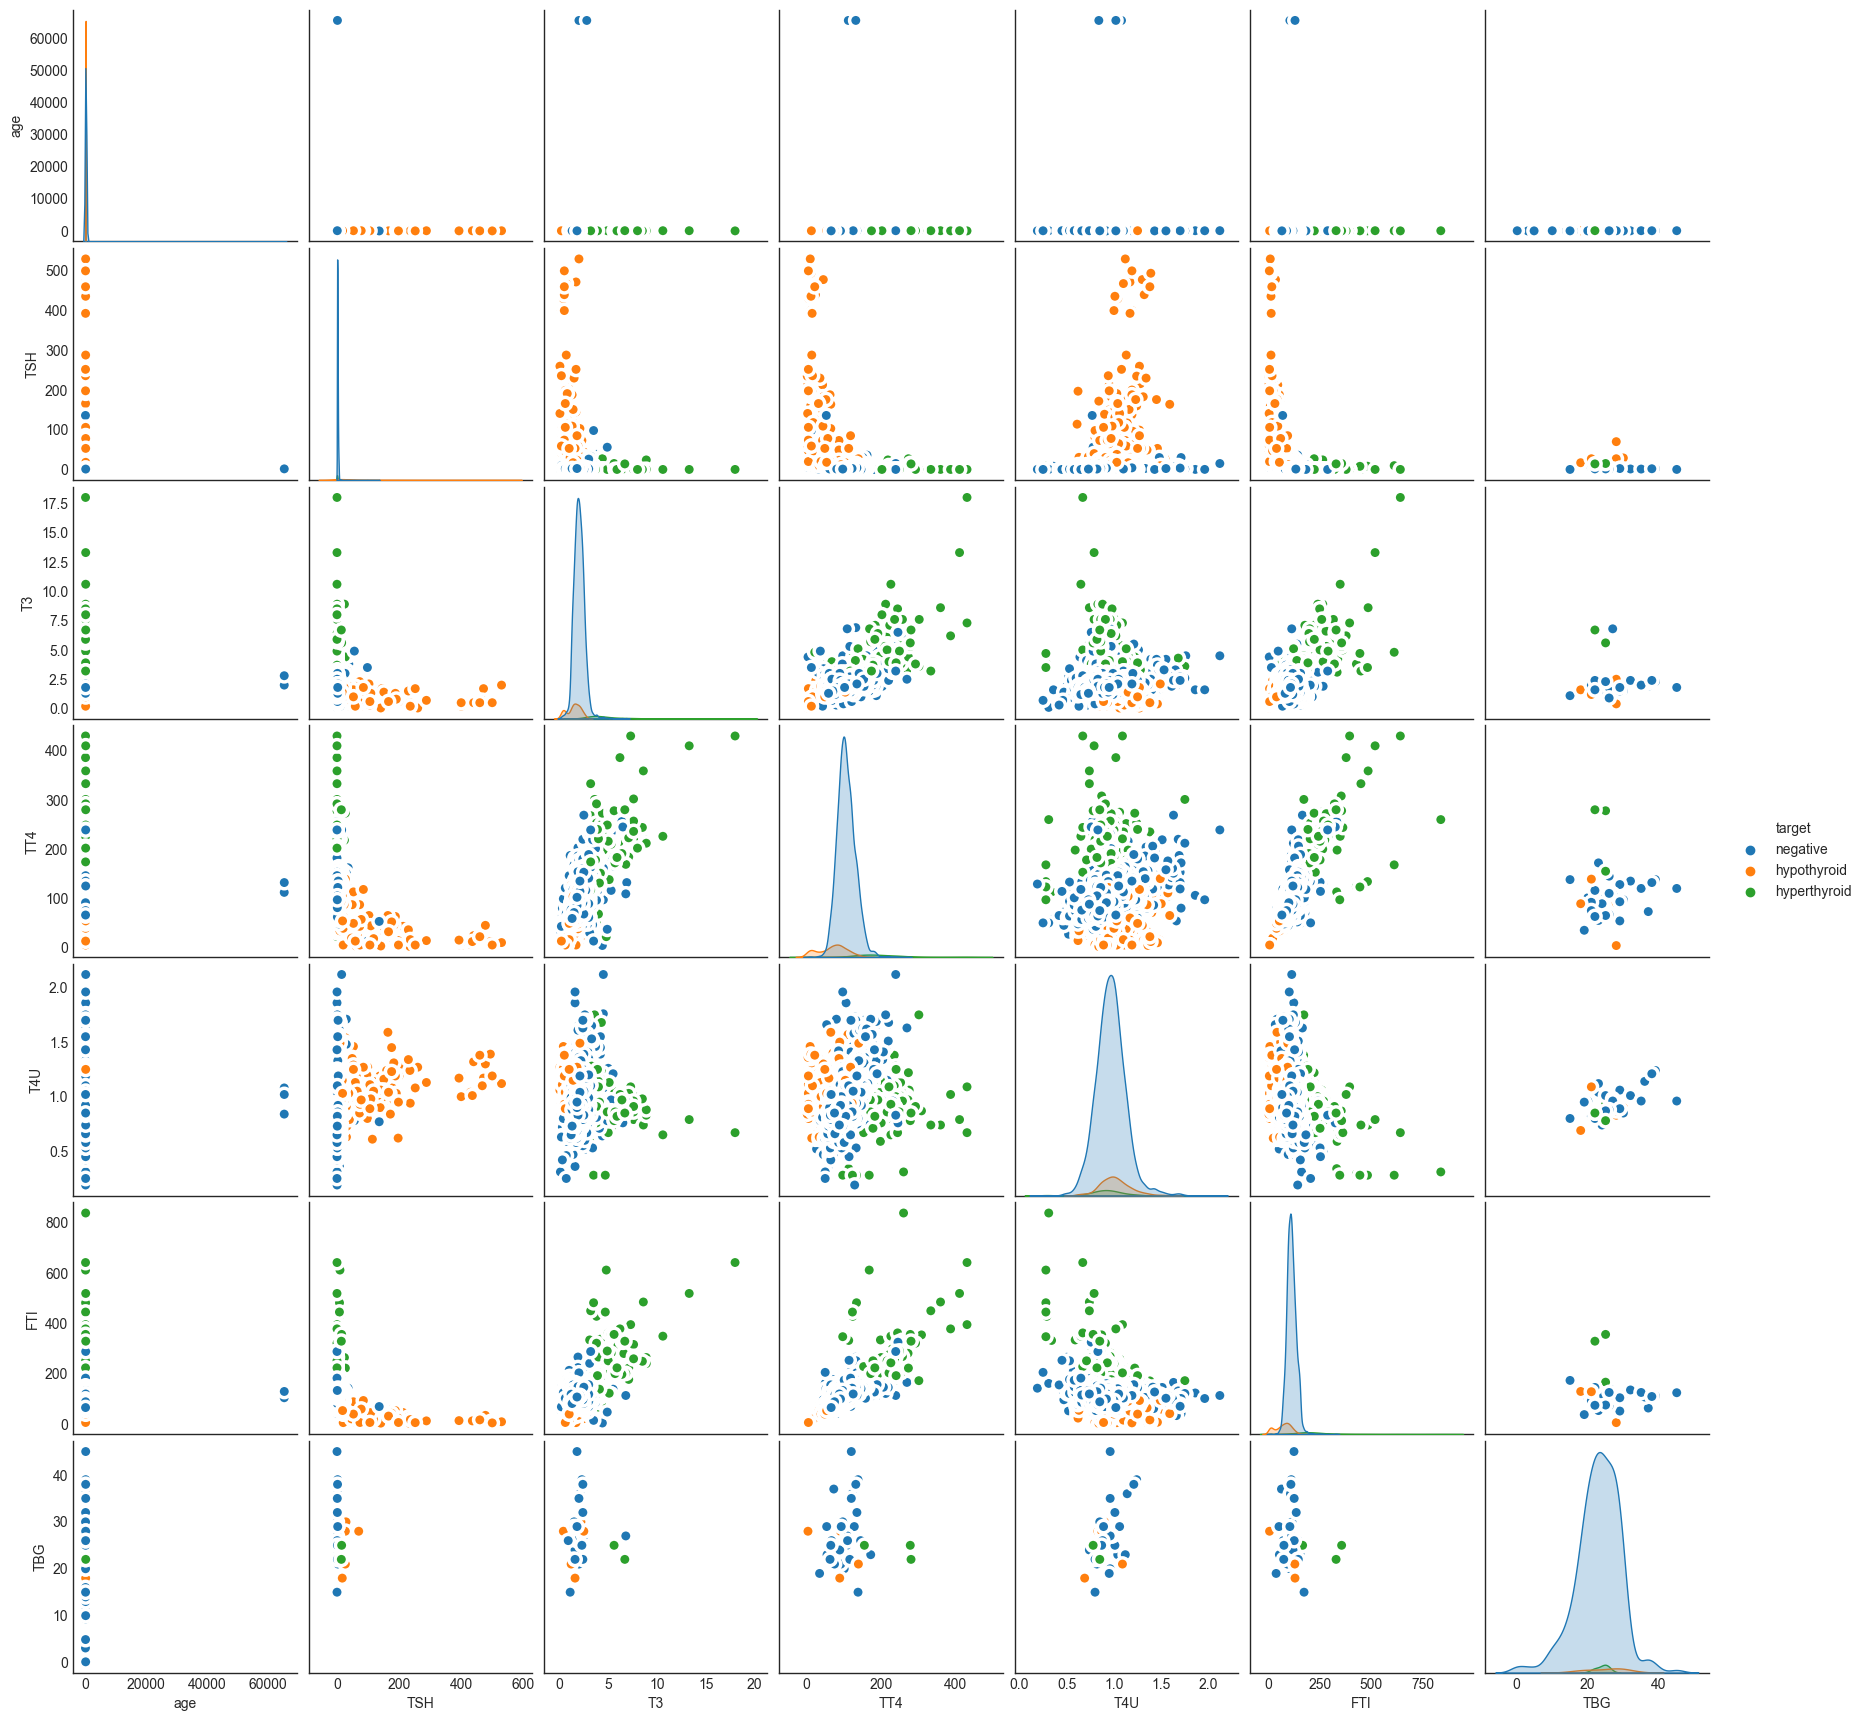

In [10]:
data_for_observation1 = ctry[['age','TSH','T3','TT4','T4U','FTI','TBG','target']].copy()
sns.pairplot(data_for_observation, kind="scatter", hue="target", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [11]:
#dtry = ctry.copy()
etry = ctry.copy()

In [12]:
# detecting the outlier for Attributes using IQR and Using the convenient pandas .quantile() function,
#we can create a simple Python function that takes in our column from the dataframe and outputs the outliers:

# TSH
Q1_TSH1 = etry['TSH'].quantile(0.25)
 
Q3_TSH1 = etry['TSH'].quantile(0.75)
IQR_TSH = Q3_TSH1 - Q1_TSH1
 
#print("Old Shape: ", etry.shape)
 
# Upper bound
upper_TSH = etry['TSH'] >= (Q3_TSH1+1.5*IQR_TSH)
# Lower bound
lower_TSH = etry['TSH'] <= (Q1_TSH1-1.5*IQR_TSH)


In [14]:
print('TSH:', 'lower outliers -', sum(lower_TSH), ' | upper outliers -', sum(upper_TSH))

TSH: lower outliers - 0  | upper outliers - 884


In [15]:

# TT4
Q1_TT4 = etry['TT4'].quantile(0.25)
 
Q3_TT4 = etry['TT4'].quantile(0.75)
IQR_TT4 = Q3_TT4 - Q1_TT4
 
# Upper bound
upper_TT4 = etry['TT4'] >= (Q3_TT4+1.5*IQR_TT4)
# Lower bound
lower_TT4 = etry['TT4'] <= (Q1_TT4-1.5*IQR_TT4)
print('TT4:', 'lower outliers -', sum(lower_TT4), ' | upper outliers -', sum(upper_TT4))

#T3

Q1_T3 = etry['T3'].quantile(0.25)
Q3_T3 = etry['T3'].quantile(0.75)

IQR_T3 = Q3_T3 - Q1_T3

#upper bound
upper_T3 = etry['T3'] >= (Q3_T3+1.5*IQR_T3)

#lower bound
lower_T3 = etry['T3'] <= (Q1_T3-1.5*IQR_T3)
print('T3:', 'lower outliers -', sum(lower_T3), ' | upper outliers -', sum(upper_T3))

#FTI

Q1_FTI = etry['FTI'].quantile(0.25)
Q3_FTI = etry['FTI'].quantile(0.75)

IQR_FTI = Q3_FTI - Q1_FTI

#upper bound
upper_FTI = etry['FTI'] >= (Q3_FTI+1.5*IQR_FTI)

#lower bound
lower_FTI = etry['FTI'] <= (Q1_FTI-1.5*IQR_FTI)

print('FTI:', 'lower outliers -', sum(lower_FTI), ' | upper outliers -', sum(upper_FTI))

#T4U
Q1_T4U = etry['T4U'].quantile(0.25)
Q3_T4U = etry['T4U'].quantile(0.75)

IQR_T4U = Q3_T4U - Q1_T4U

#upper bound
upper_T4U = etry['T4U'] >= (Q3_T4U+1.5*IQR_T4U)

#lower bound
lower_T4U = etry['T4U'] <= (Q1_T4U-1.5*IQR_T4U)

print('T4U:', 'lower outliers -', sum(lower_T4U), ' | upper outliers -', sum(upper_T4U))

# TBG

Q1_TBG = etry['TBG'].quantile(0.25)
Q3_TBG = etry['TBG'].quantile(0.75)

IQR_TBG = Q3_TBG- Q1_TBG

#upper bound
upper_TBG = etry['TBG'] >= (Q3_TBG+1.5*IQR_TBG)

#lower bound
lower_TBG = etry['TBG'] <= (Q1_TBG-1.5*IQR_TBG)

print('TBG:', 'lower outliers -', sum(lower_TBG), ' | upper outliers -', sum(upper_TBG))


TT4: lower outliers - 132  | upper outliers - 290
T3: lower outliers - 94  | upper outliers - 266
FTI: lower outliers - 164  | upper outliers - 337
T4U: lower outliers - 85  | upper outliers - 335
TBG: lower outliers - 4  | upper outliers - 26


In [38]:
# Boxplot
#Rotating the box plot so it is horizontal



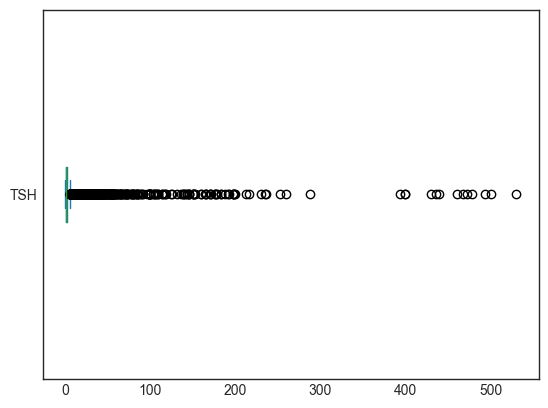

In [20]:
etry['TSH'].plot(kind='box', vert=False);


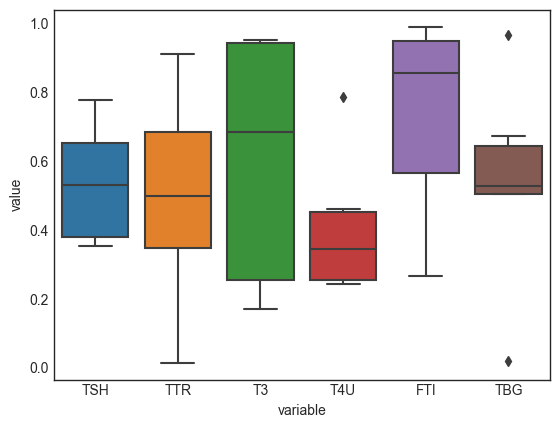

In [30]:
#sns.boxplot(x=titanic_dataset["age"])
fir = pd.DataFrame(data = np.random.random(size=(6,6)), columns = ['TSH','TTR','T3','T4U','FTI','TBG'])

sns.boxplot(x="variable", y="value", data=pd.melt(fir))

plt.show()

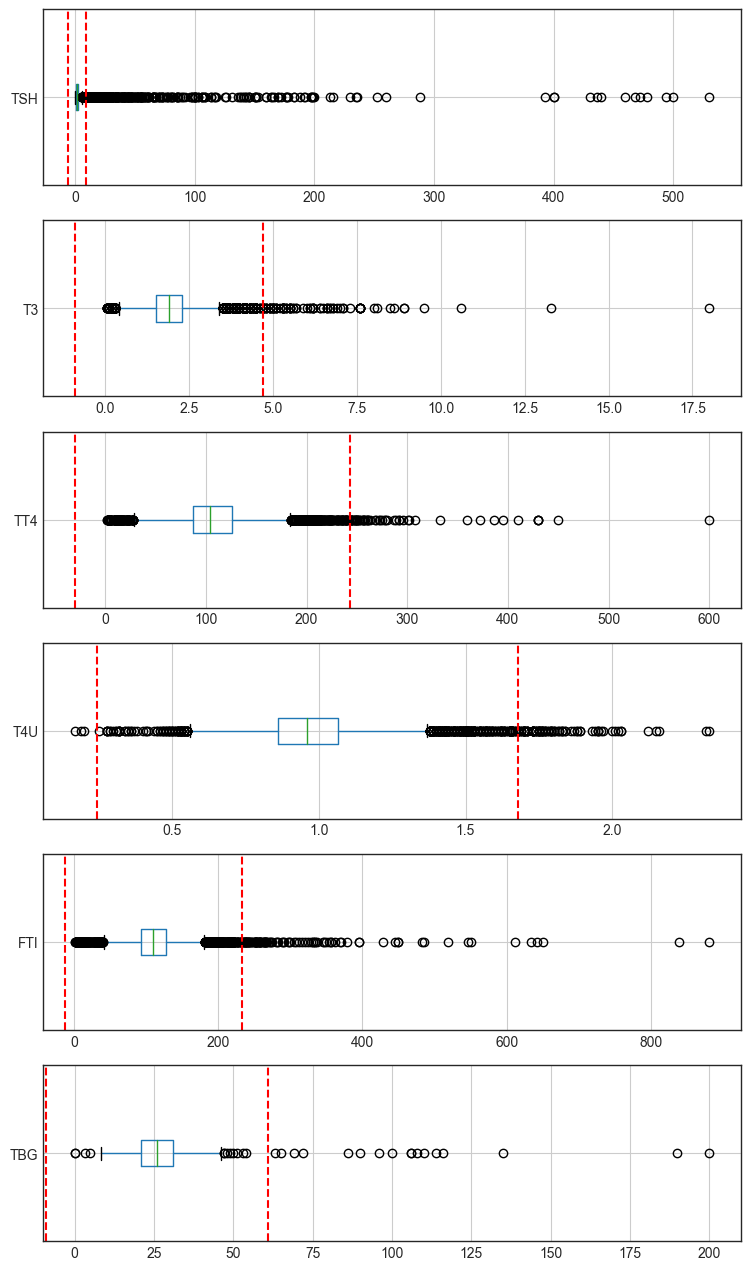

In [35]:
# preparing boxplots
fig, axs= plt.subplots(nrows = 6, figsize=(9,16))

# TSH
etry.boxplot(column='TSH', ax=axs[0], vert = False)
axs[0].axvline(x=(Q1_TSH1 - 3*IQR_TSH), color='r', linestyle='--')
axs[0].axvline(x=(Q3_TSH1 + 3*IQR_TSH), color='r', linestyle='--')
# T3
etry.boxplot(column='T3', ax=axs[1], vert = False)
axs[1].axvline(x=(Q1_T3 - 3*IQR_T3), color='r', linestyle='--')
axs[1].axvline(x=(Q3_T3 + 3*IQR_T3), color='r', linestyle='--')
# TT4
etry.boxplot(column='TT4', ax=axs[2], vert = False)
axs[2].axvline(x=(Q1_TT4 - 3*IQR_TT4), color='r', linestyle='--')
axs[2].axvline(x=(Q3_TT4 + 3*IQR_TT4), color='r', linestyle='--')
# T4U
etry.boxplot(column='T4U', ax=axs[3], vert = False)
axs[3].axvline(x=(Q1_T4U - 3*IQR_T4U), color='r', linestyle='--')
axs[3].axvline(x=(Q3_T4U + 3*IQR_T4U), color='r', linestyle='--')
# FTI
etry.boxplot(column='FTI', ax=axs[4], vert = False)
axs[4].axvline(x=(Q1_FTI - 3*IQR_FTI), color='r', linestyle='--')
axs[4].axvline(x=(Q3_FTI + 3*IQR_FTI), color='r', linestyle='--')
#TBG
etry.boxplot(column='TBG', ax=axs[5], vert = False)
axs[5].axvline(x=(Q1_TBG - 3*IQR_TBG), color='r', linestyle='--')
axs[5].axvline(x=(Q3_TBG + 3*IQR_TBG), color='r', linestyle='--')

In [54]:
#''' Removing the Outliers '''

#Rem_TSH = etry[(etry.TSH>lower_TSH) & (etry.TSH<upper_TSH)]
#Rem_TSH.shape
etry.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9168.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000
mean,52.099695,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057
std,18.910296,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,67.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000
max,97.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [12]:
uktry = etry.copy()

In [13]:
uktry.dropna(subset=['age'], inplace=True)
uktry['T3'].fillna(0, inplace=True)
uktry['TT4'].fillna(0, inplace=True)
uktry['T4U'].fillna(0, inplace=True)
uktry['FTI'].fillna(0, inplace=True)
uktry['TBG'].fillna(0, inplace=True)
uktry['TSH'].fillna(0, inplace=True)
uktry['target'].fillna(0, inplace=True)

In [14]:
# changing sex of observations with ('pregnant' == True) & ('sex' == null) to Female
uktry['sex'] = np.where((uktry.sex.isnull()) & (uktry.pregnant == 't'), 'F', uktry.sex)
uktry['sex'].fillna(0, inplace=True)

In [105]:
uktry.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
TBG                    0
target                 0
dtype: int64

In [80]:
uktry.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29.0,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,0.0,0.0,0.0,0.0,0.0,negative
1,29.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,0.0,0.0,0.0,negative
2,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.0,0.0,0.0,0.0,0.0,11.0,negative
3,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.0,0.0,0.0,0.0,0.0,26.0,negative
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.0,0.0,0.0,0.0,0.0,36.0,NaN


In [15]:
wtry = uktry.copy()
wtry.head(4)


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29.0,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,0.0,0.0,0.0,0.0,0.0,negative
1,29.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,0.0,0.0,0.0,negative
2,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.0,0.0,0.0,0.0,0.0,11.0,negative
3,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.0,0.0,0.0,0.0,0.0,26.0,negative


In [89]:
#RM_TSH= wtry[(wtry.TSH>lower_TSH) & (wtry.TSH<upper_TSH)]

In [16]:
# preprocessing the data:

# replacing boolean strings with binary 0 and 1
uktry.replace('f', 0, inplace=True)
uktry.replace('t', 1, inplace=True)

# replacing sex with binary 0 and 1
uktry.replace('M', 0, inplace=True) # male mapped to 0
uktry.replace('F', 1, inplace=True) # female mapped to 1




In [17]:
uktry['target'].isnull().sum()

0

In [18]:
uktry.replace('negative', 0, inplace=True) # male mapped to 0
uktry.replace('hypothyroid', 1, inplace=True)
uktry.replace('hyperthyroid', 2, inplace=True)

In [134]:
uktry.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0.3,0.0,0.0,0.0,0.0,0.0,0
1,29.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1.6,1.9,128.0,0.0,0.0,0.0,0
2,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0,0
3,36.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,26.0,0
4,32.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,36.0,0


In [21]:
# train and split the data 
# train and test split (in x all input data and Y )
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = uktry.drop('target', axis=1).copy()
y = uktry['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [22]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.2216289298080003

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.18702602, 0.1997842 , 0.16012041, 0.17146604, 0.25786835])

In [25]:
from sklearn import tree

In [26]:
model = tree.DecisionTreeClassifier()

In [29]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model.predict([])